# Challenge - ANOVA

In statistics, **Analysis of Variance (ANOVA)** is also used to analyze the differences among group means. The difference between t-test and ANOVA is the former is ued to compare two groups whereas the latter is used to compare three or more groups. [Read more about the difference between t-test and ANOVA](https://keydifferences.com/difference-between-t-test-and-anova.html).

From the ANOVA test, you receive two numbers. The first number is called the **F-value** which indicates whether your null-hypothesis can be rejected. The critical F-value that rejects the null-hypothesis varies according to the number of total subjects and the number of subject groups in your experiment. In [this table](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3673.htm) you can find the critical values of the F distribution. **If you are confused by the massive F-distribution table, don't worry. Skip F-value for now and study it at a later time. In this challenge you only need to look at the p-value.**

The p-value is another number yielded by ANOVA which already takes the number of total subjects and the number of experiment groups into consideration. **Typically if your p-value is less than 0.05, you can declare the null-hypothesis is rejected.**

In this challenge, we want to understand whether there are significant differences among various types of pokemons' `Total` value, i.e. Grass vs Poison vs Fire vs Dragon... There are many types of pokemons which makes it a perfect use case for ANOVA.

In [53]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, norm, f, chi2, chi2_contingency
import warnings
warnings.simplefilter('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import chi2_contingency
from statsmodels.stats import weightstats as w


In [3]:
%pip install streamlit

  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=c59b326044958381a24047d45c518b59689fde67fd5f050acae666a58156600f
  Stored in directory: c:\users\javip\appdata\local\pip\cache\wheels\b7\a5\68\fe632054a5eadd531c7a49d740c50eb6adfbeca822b4eab8d4
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=dd05b8b313bbf48a92aacbba2629789805d1723688514c39703e589534248bfd
  Stored in directory: c:\users\javip\appdata\local\pip\cache\wheels\19\09\72\3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built blinker validators
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.2
    Uninstalling protobuf-4.21.2:
      Successfully uninstalled protobuf-4.21.2


In [17]:
# Import dataset

pokemon = pd.read_csv(r'C:\Users\javip\Lab1\Laboratorios\6.3-lab_two_sample_hypothesis_test\pokemon.csv')

pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**To achieve our goal, we use three steps:**

1. **Extract the unique values of the pokemon types.**

1. **Select dataframes for each unique pokemon type.**

1. **Conduct ANOVA analysis across the pokemon types.**

#### First let's obtain the unique values of the pokemon types. These values should be extracted from Type 1 and Type 2 aggregated. Assign the unique values to a variable called `unique_types`.

*Hint: the correct number of unique types is 19 including `NaN`. You can disregard `NaN` in next step.*

In [37]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [38]:
import IPython.display as display
from PIL import Image
import cv2

In [44]:
img = cv2.imread('pkmn.jpg')
res = cv2.resize(img, dsize=(54, 140), interpolation=cv2.INTER_CUBIC)
img = cv2.imread('pkmn.jpg',0)
cv2.imshow('pkmn.jpg',img)


In [31]:
unique_types = pokemon['Type 1'].unique()
len(unique_types) # you should see 19       ESTO ES MENTIRA SALEN 18 A MI NO ME SALE EL NaN SOY UN PRO

18

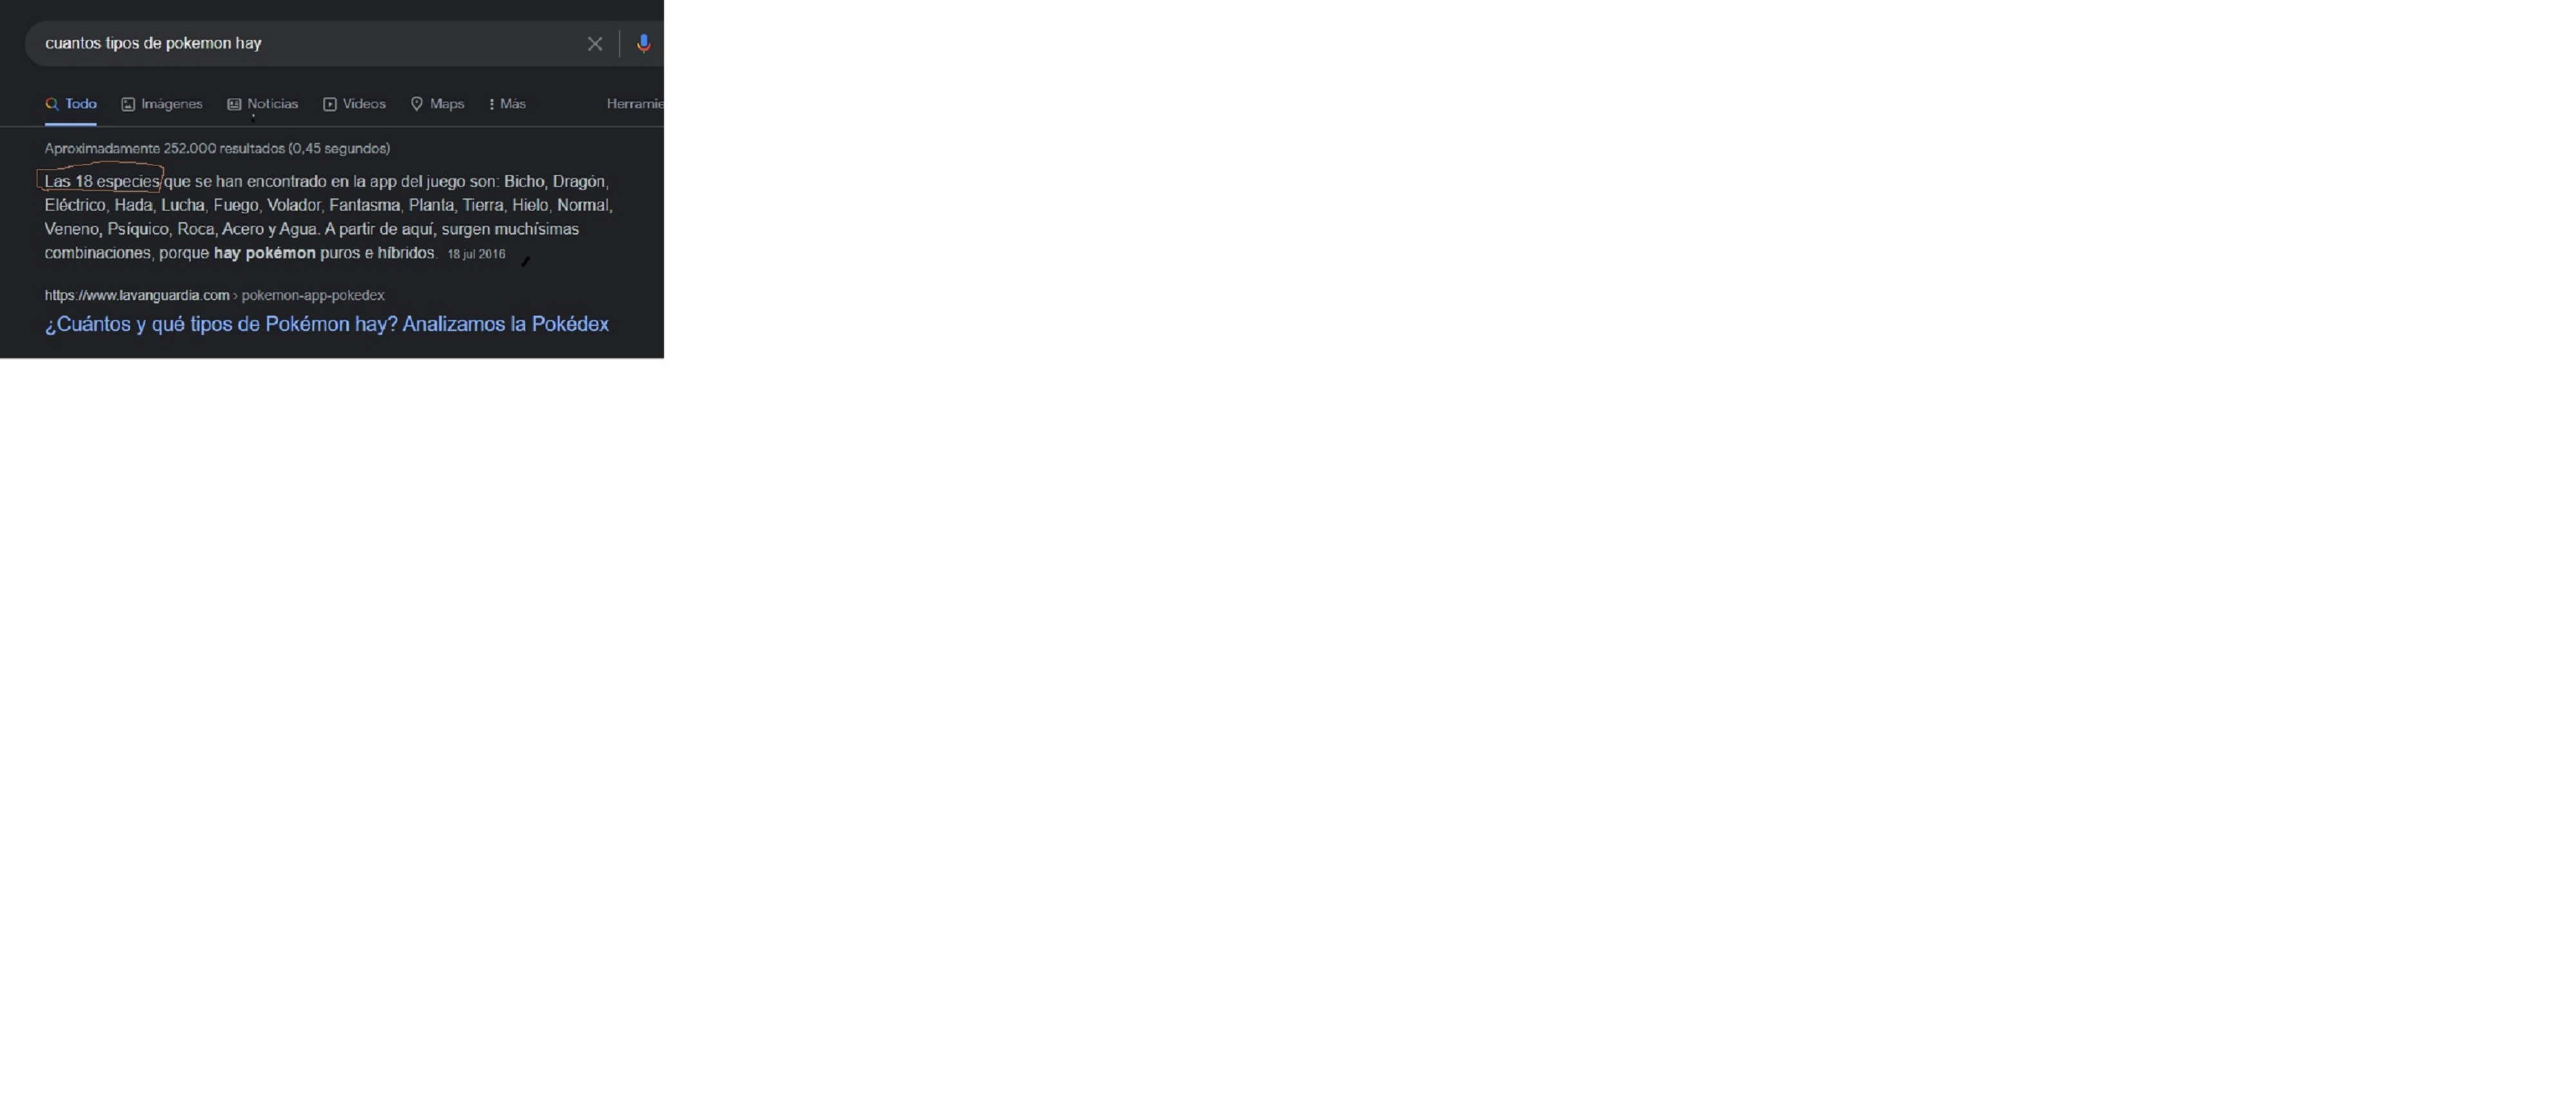

In [58]:
display.display(Image.open('pkmn.jpg')) # he intentado hacerle zoom pero no lo consigo

In [49]:
unique_types

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

#### Second we will create a list named `pokemon_totals` to contain the `Total` values of each unique type of pokemons.

Why we use a list instead of a dictionary to store the pokemon `Total`? It's because ANOVA only tells us whether there is a significant difference of the group means but does not tell which group(s) are significantly different. Therefore, we don't need know which `Total` belongs to which pokemon type.

*Hints:*

* Loop through `unique_types` and append the selected type's `Total` to `pokemon_groups`.
* Skip the `NaN` value in `unique_types`. `NaN` is a `float` variable which you can find out by using `type()`. The valid pokemon type values are all of the `str` type.
* At the end, the length of your `pokemon_totals` should be 18.

In [50]:
pokemon_totals = []
for e in unique_types:
    pokemon_totals += ([pokemon[(pokemon['Type 1'] == e)|(pokemon['Type 2'] == e)]['Total']])

len(pokemon_totals) # you should see 18

18

#### Now we run ANOVA test on `pokemon_totals`.

*Hints:*

* To conduct ANOVA, you can use `scipy.stats.f_oneway()`. Here's the [reference](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html).

* What if `f_oneway` throws an error because it does not accept `pokemon_totals` as a list? The trick is to add a `*` in front of `pokemon_totals`, e.g. `stats.f_oneway(*pokemon_groups)`. This trick breaks the list and supplies each list item as a parameter for `f_oneway`.

In [51]:
from statsmodels.multivariate.manova import MANOVA


#### Interpret the ANOVA test result. Is the difference significant?

In [56]:
test = stats.f_oneway(*pokemon_totals)
test.pvalue

2.6457458815984803e-15

In [57]:
test.pvalue < 0.05

True

In [ ]:
#El pvalor es menor a 0,05 por lo que podemos rechazar H0 y decir que si puede haber diferencia significativa entre el tipo de los pokemon